<a href="https://colab.research.google.com/github/chrisldz/ECON3916-33674-Statistical-Machine-Learning/blob/main/Assignment%201/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Football', 'Price_2016': 30, 'Price_2024': 40}
]

In [68]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Football: 33.33% Inflation


In [69]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='b7f6004f1ff995d6ddb76979acba563f')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
cable_tv= fred.get_series('CUSR0000SERA02')
food = fred.get_series('CUSR0000SEFV')
# Added Rent
# ... fetch remaining series

In [70]:
import pandas as pd

In [71]:
df = pd.DataFrame({
    "CPI": official_cpi,
    "Tuition": tuition,
    "Rent": rent,
    "Streaming": cable_tv,
    "Food": food
})

In [72]:
df.head()

,CPI,Tuition,Rent,Streaming,Food
1947-01-01,21.48,NaN,NaN,NaN,NaN
1947-02-01,21.62,NaN,NaN,NaN,NaN
1947-03-01,22.00,NaN,NaN,NaN,NaN
1947-04-01,22.00,NaN,NaN,NaN,NaN
1947-05-01,21.95,NaN,NaN,NaN,NaN


In [73]:
df = df[df.index.year >= 2016]

In [74]:
df.head()


,CPI,Tuition,Rent,Streaming,Food
2016-01-01,237.652,699.997,291.700,427.538,259.958
2016-02-01,237.336,701.688,292.617,430.633,260.319
2016-03-01,238.080,703.289,293.471,433.738,260.883
2016-04-01,238.992,704.842,294.397,435.570,261.517
2016-05-01,239.557,706.506,295.371,437.005,262.074


In [75]:
base_year = 2016
base_values = df[df.index.year == base_year].iloc[0]

In [76]:
df_index = df / base_values * 100

In [77]:
df_index.head()

,CPI,Tuition,Rent,Streaming,Food
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.723912,100.138869
2016-03-01,100.180095,100.470288,100.607131,101.450163,100.355827
2016-04-01,100.563850,100.692146,100.924580,101.878663,100.599712
2016-05-01,100.801592,100.929861,101.258485,102.214306,100.813978


In [78]:
import matplotlib.pyplot as plt

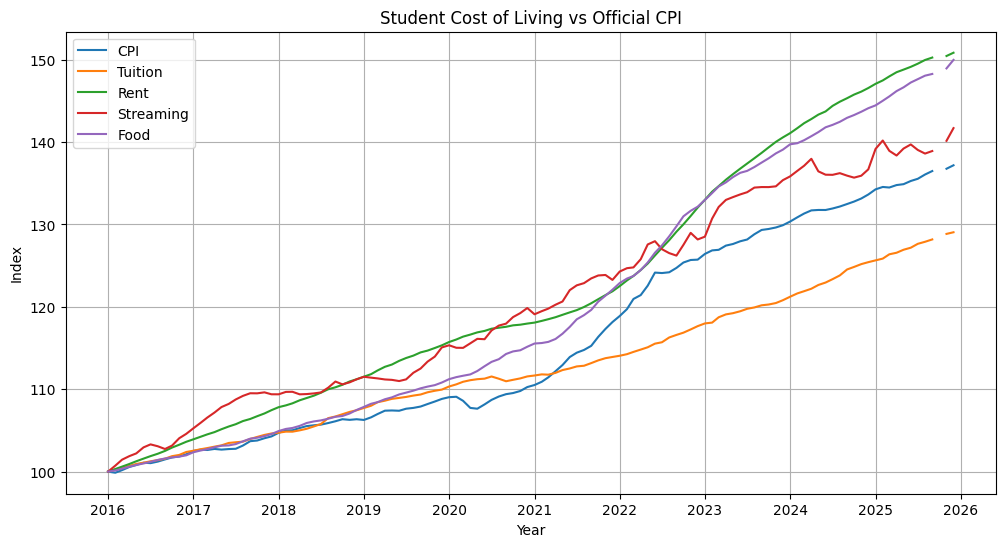

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(df_index.index, df_index["CPI"], label="CPI")
plt.plot(df_index.index, df_index["Tuition"], label="Tuition")
plt.plot(df_index.index, df_index["Rent"], label="Rent")
plt.plot(df_index.index, df_index["Streaming"], label="Streaming")
plt.plot(df_index.index, df_index["Food"], label="Food")
plt.title("Student Cost of Living vs Official CPI")
plt.xlabel("Year")
plt.ylabel("Index")
plt.legend()
plt.grid(True)
plt.show()

In [80]:
weights = {
    "Tuition": 0.4,
    "Rent": 0.3,
    "Food": 0.2,
    "Streaming": 0.1
}

In [81]:
df_index["Student_SPI"] = (
    df_index["Tuition"] * weights["Tuition"] +
    df_index["Rent"] * weights["Rent"] +
    df_index["Food"] * weights["Food"] +
    df_index["Streaming"] * weights["Streaming"]
)

In [82]:
df_index[["Student_SPI"]].head()

,Student_SPI
2016-01-01,100.000000
2016-02-01,100.291103
2016-03-01,100.586436
2016-04-01,100.862041
2016-05-01,101.133716


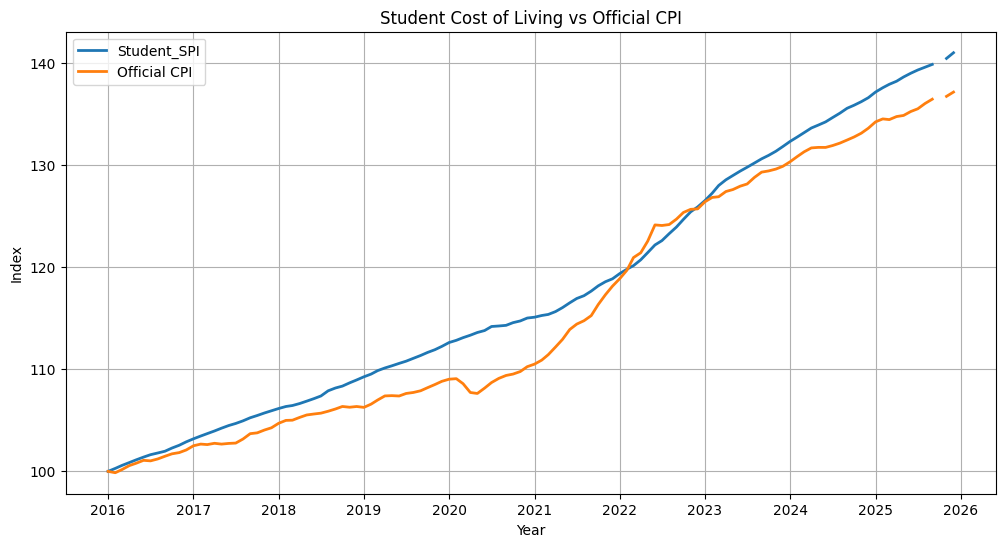

In [83]:
plt.figure(figsize=(12, 6))

plt.plot(df_index.index, df_index["Student_SPI"], label="Student_SPI", linewidth=2)
plt.plot(df_index.index, df_index["CPI"], label="Official CPI", linewidth=2)

plt.title("Student Cost of Living vs Official CPI")
plt.xlabel("Year")
plt.ylabel("Index")
plt.legend()
plt.grid(True)

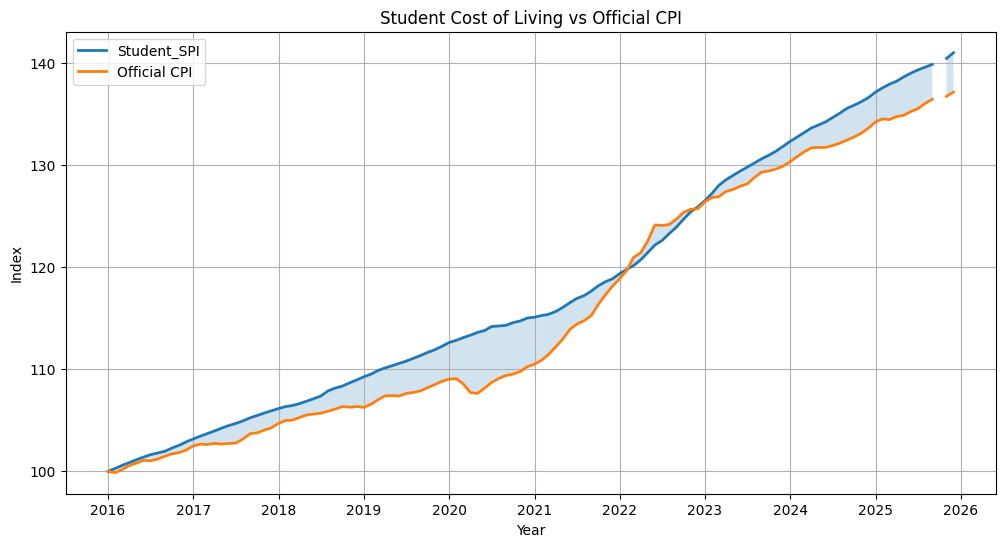

In [84]:
plt.figure(figsize=(12, 6))

plt.plot(df_index.index, df_index["Student_SPI"], label="Student_SPI", linewidth=2)
plt.plot(df_index.index, df_index["CPI"], label="Official CPI", linewidth=2)

plt.title("Student Cost of Living vs Official CPI")
plt.xlabel("Year")
plt.ylabel("Index")
plt.legend()
plt.grid(True)
plt.fill_between(
    df_index.index,
    df_index["Student_SPI"],
    df_index["CPI"],
    alpha=0.2
)

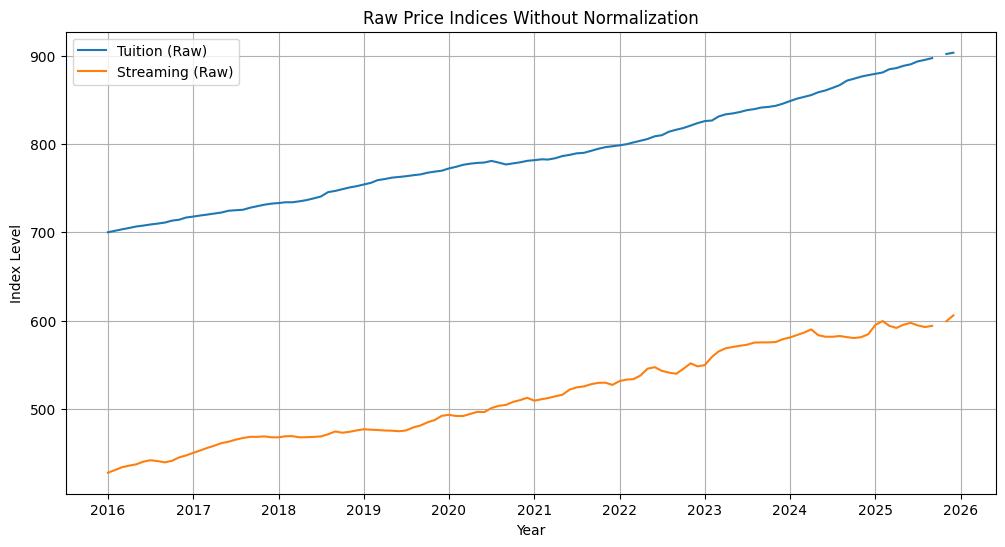

In [85]:
plt.figure(figsize=(12, 6))

plt.plot(df.index, df["Tuition"], label="Tuition (Raw)")
plt.plot(df.index, df["Streaming"], label="Streaming (Raw)")

plt.title("Raw Price Indices Without Normalization")
plt.xlabel("Year")
plt.ylabel("Index Level")
plt.legend()
plt.grid(True)
plt.show()

In [86]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

fred = Fred(api_key="b7f6004f1ff995d6ddb76979acba563f ")

# National CPI
national_cpi = fred.get_series("CPIAUCSL")

# Boston-Cambridge-Newton CPI
boston_cpi = fred.get_series("CUURA103SA0")


In [87]:
df_phase4 = pd.DataFrame({
    "National_CPI_raw": national_cpi,
    "Boston_CPI_raw": boston_cpi
})

df_phase4 = df_phase4[df_phase4.index.year >= 2016]

base_vals = df_phase4[df_phase4.index.year == 2016].iloc[0]

df_phase4["National_CPI"] = df_phase4["National_CPI_raw"] / base_vals["National_CPI_raw"] * 100
df_phase4["Boston_CPI"] = df_phase4["Boston_CPI_raw"] / base_vals["Boston_CPI_raw"] * 100


In [88]:
df_final = df_phase4.join(df_index["Student_SPI"], how="inner")
df_final.head()


,National_CPI_raw,Boston_CPI_raw,National_CPI,Boston_CPI,Student_SPI
2016-01-01,237.652,257.215,100.000000,100.000000,100.000000
2016-02-01,237.336,NaN,99.867032,NaN,100.291103
2016-03-01,238.080,258.587,100.180095,100.533406,100.586436
2016-04-01,238.992,NaN,100.563850,NaN,100.862041
2016-05-01,239.557,260.809,100.801592,101.397275,101.133716


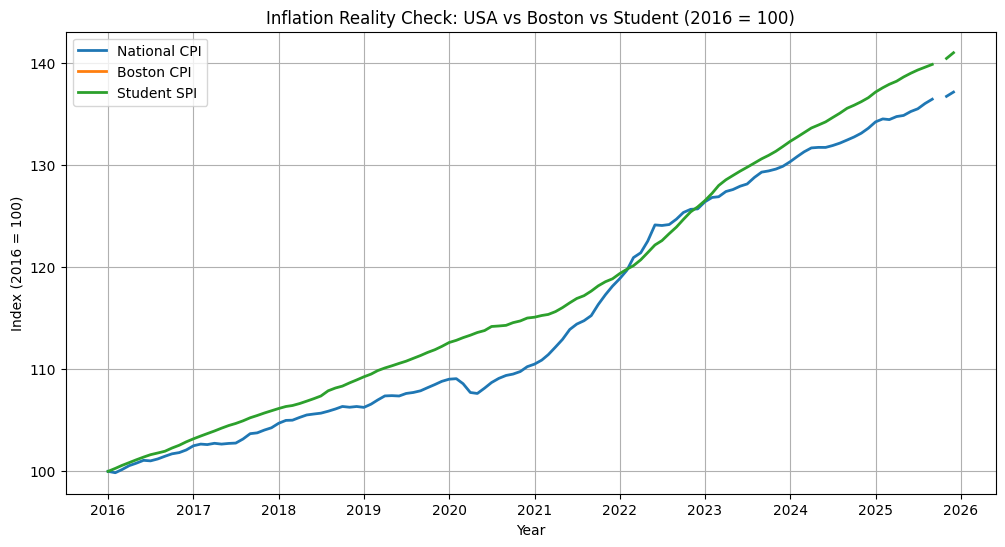

In [89]:
plt.figure(figsize=(12,6))

plt.plot(df_final.index, df_final["National_CPI"], label="National CPI", linewidth=2)
plt.plot(df_final.index, df_final["Boston_CPI"], label="Boston CPI", linewidth=2)
plt.plot(df_final.index, df_final["Student_SPI"], label="Student SPI", linewidth=2)

plt.title("Inflation Reality Check: USA vs Boston vs Student (2016 = 100)")
plt.xlabel("Year")
plt.ylabel("Index (2016 = 100)")
plt.legend()
plt.grid(True)
plt.show()
